<a href="https://colab.research.google.com/github/msaristizaball/Mineria_de_Datos/blob/main/produccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Lectura de datos


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 6
from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

In [29]:
produccion = pd.read_excel("/content/produccion de cafe mensual.xlsx",header=0,
                       names=["Fecha","Produccion"])
produccion.info()
produccion.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       799 non-null    datetime64[ns]
 1   Produccion  799 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.6 KB


,Fecha,Produccion
0,1956-01-01,693.0
1,1956-02-01,461.0
2,1956-03-01,339.0
3,1956-04-01,417.0
4,1956-05-01,644.0
5,1956-06-01,954.0
6,1956-07-01,1010.0
7,1956-08-01,484.0
8,1956-09-01,387.0
9,1956-10-01,279.0


In [30]:
#precio['Fecha']=pd.to_datetime(precio['Fecha'])###Sólo es necesario si no tiene formato de fecha
produccion=produccion.set_index('Fecha')
print(type(produccion))


produccion.info()
produccion.head(10)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 799 entries, 1956-01-01 to 2022-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Produccion  799 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


,Produccion
Fecha,
1956-01-01,693.0
1956-02-01,461.0
1956-03-01,339.0
1956-04-01,417.0
1956-05-01,644.0
1956-06-01,954.0
1956-07-01,1010.0
1956-08-01,484.0
1956-09-01,387.0


<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Producción de café mensual')

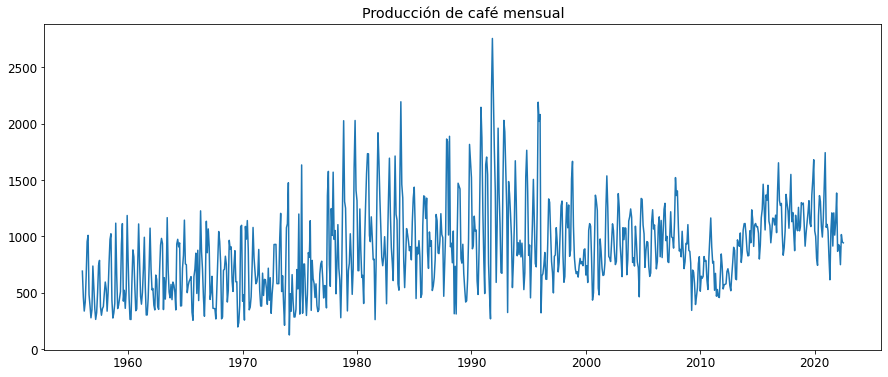

In [34]:
#define ts
produccionts=produccion['Produccion']
print(type(produccionts))
plt.plot(produccionts)
plt.title('Producción de café mensual') 
##%qtconsole

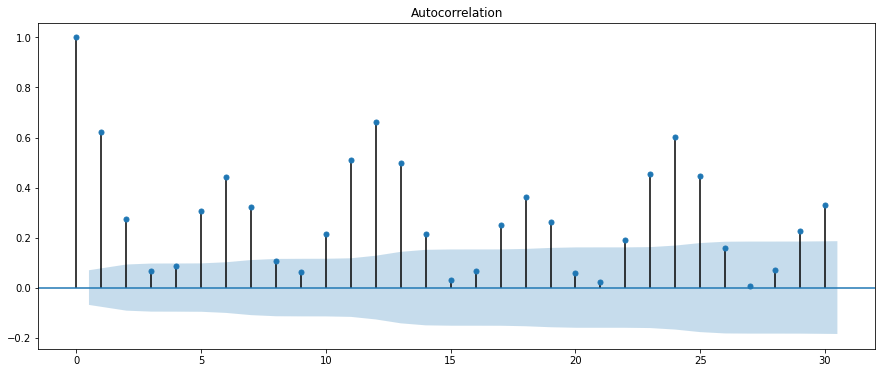

In [13]:
acfproduccion=plot_acf(produccion,adjusted=False)

# Análisis Descriptivo

In [35]:
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt

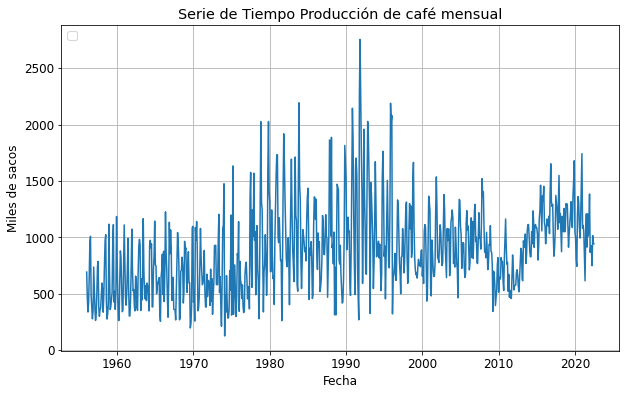

In [36]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(produccionts, color='tab:blue')
ax.set_xlabel('Fecha')
ax.set_ylabel('Miles de sacos')
ax.set_title('Serie de Tiempo Producción de café mensual')
ax.grid(True)
ax.legend(loc='upper left');

# Transformación de Box-Cox para Estabilizar la Varianza Marginal

$$
f_\lambda\left(u_t\right)= \begin{cases}\lambda^{-1}\left(u_t^\lambda-1\right), & \text { si } u_t \geq 0, \text { para } \lambda>0 \\ \ln \left(u_t\right), & \text { si } u_t>0, \text { para } \lambda=0\end{cases}
$$

In [50]:

#####Transformación Box-Cox
import scipy as sp
import scipy.stats 
#sp.stats.boxcox(data['NPassengers'],alpha=0.05)
produccion=sp.stats.boxcox(produccion['Produccion'],lmbda=0)
prod = produccionts.assign(produccion=produccion)   


IndexError: ignored

In [ ]:
log_produccion=prod.set_index('Month')   
logAirPass=  logpasajeros['logAirp'] 
plt.plot(logAirPass)
plt.title('Serie con Tranformación Box-Cox Ln') 
plt.show()

# Diferenciación

$$
\nabla^1 Y_t=(1-B)^1 Y_t=Y_t-Y_{t-1}
$$

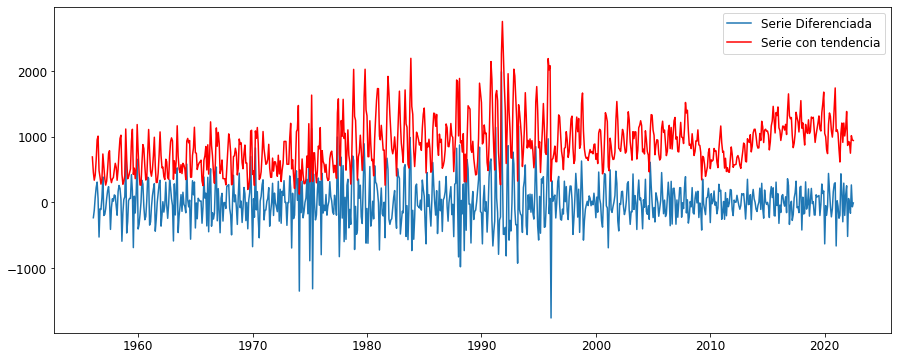

In [17]:
dif_produccionts=produccionts.diff(periods=1)

fig, ax = plt.subplots()
ax.plot(dif_produccionts, '-', label="Serie Diferenciada")
ax.plot(produccionts, 'r', label="Serie con tendencia")
ax.legend(loc="best");

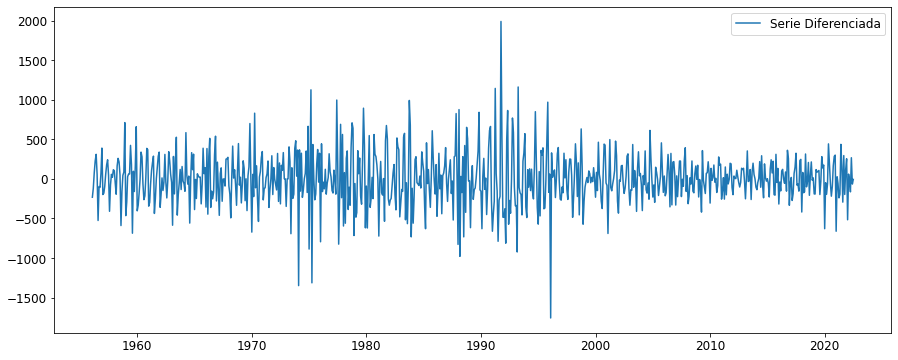

In [18]:
fig, ax = plt.subplots()
ax.plot(dif_produccionts, '-', label="Serie Diferenciada")
ax.legend(loc="best");

# Gráficos de autocorrelación

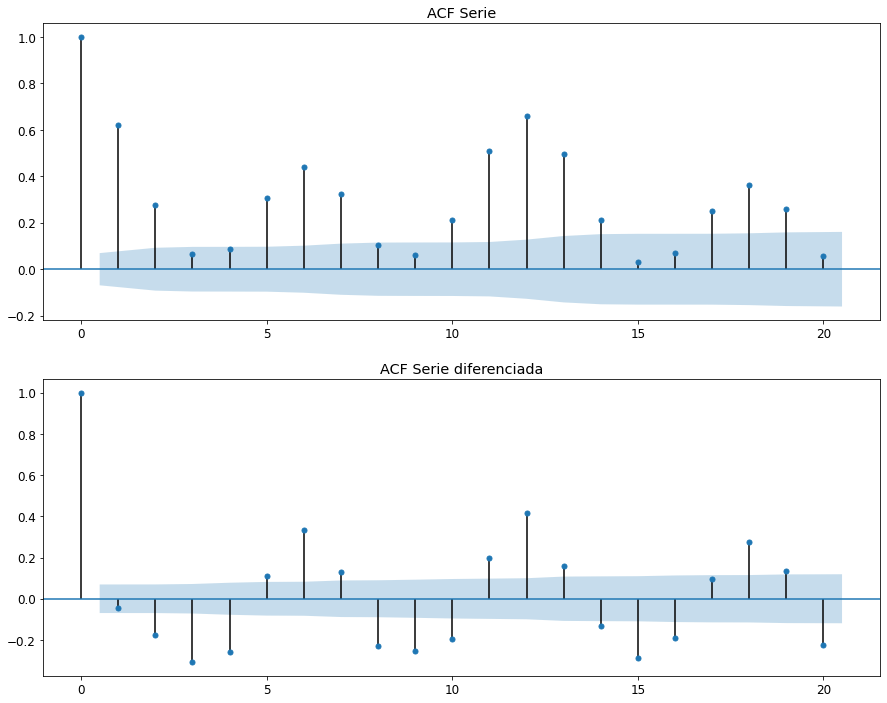

In [21]:
#InteractiveShell.ast_node_interactivity = "last"
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
a=plot_acf(produccionts,adjusted=False,lags=20,title='ACF Serie',ax=axes[0])
b=plot_acf(dif_produccionts.dropna(),adjusted=False,lags=20,title='ACF Serie diferenciada',ax=axes[1])
plt.show()
#InteractiveShell.ast_node_interactivity = "all"